In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
data = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Lets do some analysis

In [4]:
data["Exited"] = data["Exited"].map({0:"Not_Exited" , 1:"Exited"})

In [5]:
data["CustomerId"].nunique()

10000

**No unique Customer Id's are present , so we can exclude this feature while training the model**

### Analysing how customer churn is related to there active status

In [6]:
activity = data.groupby(["IsActiveMember"])[["Exited"]].value_counts().reset_index()
activity["IsActiveMember"]=activity["IsActiveMember"].map({0:"Not_Active",1:"Active"})
activity

,IsActiveMember,Exited,count
0,Not_Active,Not_Exited,3547
1,Not_Active,Exited,1302
2,Active,Not_Exited,4416
3,Active,Exited,735


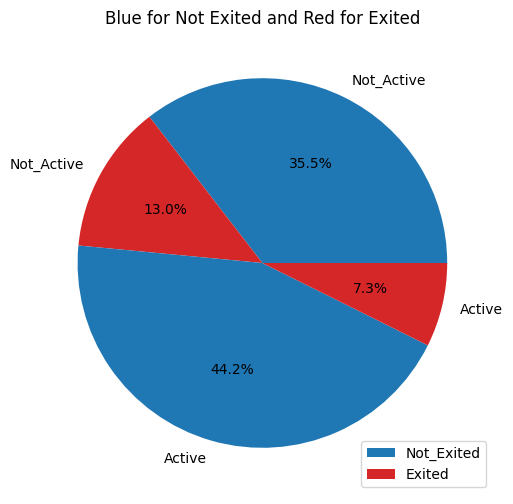

In [7]:
fig = plt.figure(figsize =(6, 6))
colours = {'Not_Exited': 'C0',
           'Exited': 'C3'
          }
labels = ["Not_Exited","Exited"]
plt.pie(activity["count"] , labels=activity["IsActiveMember"] ,autopct="%1.01f%%" ,
       colors=[colours[key] for key in labels])
plt.legend(["Not_Exited","Exited"] , loc ="lower right") 
plt.title("Blue for Not Exited and Red for Exited")
plt.show()

**It seems that mostly those peoples who are not active have exited**

### Analysing how customer churn is related to having Credit Card

In [8]:
credit_card = data.groupby(["HasCrCard"])[["Exited"]].value_counts().reset_index()
credit_card["HasCrCard"]=credit_card["HasCrCard"].map({0:"Not_CrCard",1:"Has_CrCard"})
credit_card

,HasCrCard,Exited,count
0,Not_CrCard,Not_Exited,2332
1,Not_CrCard,Exited,613
2,Has_CrCard,Not_Exited,5631
3,Has_CrCard,Exited,1424


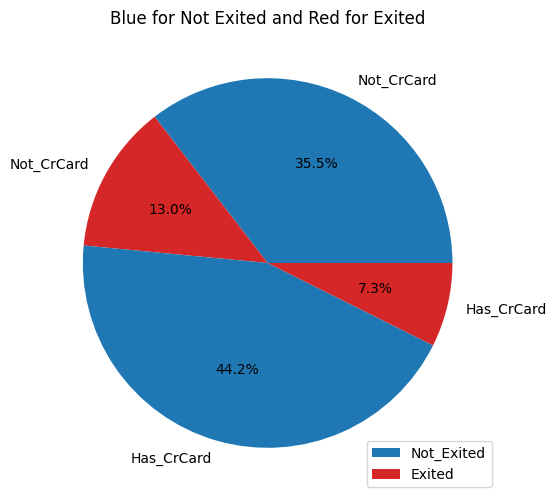

In [9]:
fig = plt.figure(figsize =(6, 6))
colours = {'Not_Exited': 'C0',
           'Exited': 'C3'
          }
labels = ["Not_Exited","Exited"]
plt.pie(activity["count"] , labels=credit_card["HasCrCard"] ,autopct="%1.01f%%" ,
       colors=[colours[key] for key in labels])
plt.legend(["Not_Exited","Exited"] , loc ="lower right") 
plt.title("Blue for Not Exited and Red for Exited")
plt.show()

**It seems that mostly those peoples who don't have credit card have exited**

### Analysing how customer churn is related to Gender and age

In [10]:
gender = data.groupby(["Gender"])[["Exited"]].value_counts().reset_index()
gender

,Gender,Exited,count
0,Female,Not_Exited,3404
1,Female,Exited,1139
2,Male,Not_Exited,4559
3,Male,Exited,898


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  object 
dtypes: float64(2), int64(8), object(4)
memory usage: 1.1+ MB


**There are no null values in the whole dataset , hence we don't have to impute anything**

In [12]:
data= data.drop(columns=["RowNumber","Surname","CustomerId"])
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Not_Exited
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Exited


## Encoding columns having categorical values

In [13]:
data["Exited"] = data["Exited"].map({"Exited":1,"Not_Exited":0})
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
data["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

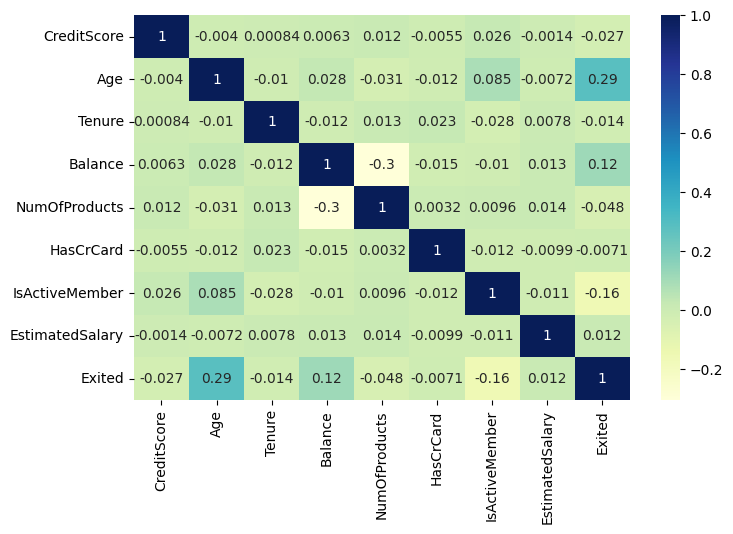

In [15]:
correlation = data.drop(columns=["Geography","Gender"])
fig = plt.figure(figsize =(8, 5))
dataplot = sb.heatmap(correlation.corr(), cmap="YlGnBu", annot=True) 
plt.show()

**No Columns are correlated to each other**

In [16]:
X = data.drop(columns=["Exited"])
y = data["Exited"]

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2,1])] , remainder='passthrough' )
X = ct.fit_transform(X)

## Splitting the dataset into train and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.2 , random_state =1)
print(X_train[1])

[1.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
 6.2600000e+02 2.9000000e+01 4.0000000e+00 1.0576728e+05 2.0000000e+00
 0.0000000e+00 0.0000000e+00 4.1104820e+04]


## Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[: ,[5,6,8,12]] = sc.fit_transform(X_train[:,[5,6,8,12]])
X_test[: ,[5,6,8,12]] = sc.transform(X_test[:,[5,6,8,12]])

In [20]:
print(X_train[1])

[ 1.          0.          1.          0.          0.         -0.25150912
 -0.94449979  4.          0.46984886  2.          0.          0.
 -1.02548708]


# **Using Different Algorithms**

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [22]:
clf = LogisticRegression(random_state=0 , penalty="l2" , max_iter=1000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [23]:
y_train1= clf.predict(X_train)
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_train, y_train1)
print(f"Accuracy on Train Set is : {accuracy_score(y_train, y_train1)}")
print(f"F1-Score on Train Set is : {f1_score(y_train,y_train1, labels=None, pos_label=1, average='weighted')}")

Accuracy on Train Set is : 0.812125
F1-Score on Train Set is : 0.7726343543294403


In [24]:
y_pred1 = clf.predict(X_test)
cp = confusion_matrix(y_test , y_pred1)
print(f"Accuracy on Test Set is : {accuracy_score(y_test, y_pred1)}")
print(f"F1-Score on Test Set is : {f1_score(y_test, y_pred1, labels=None, pos_label=1, average='weighted')}")
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred1))

Accuracy on Test Set is : 0.8125
F1-Score on Test Set is : 0.7744339281286018
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1585
           1       0.64      0.22      0.33       415

    accuracy                           0.81      2000
   macro avg       0.73      0.59      0.61      2000
weighted avg       0.79      0.81      0.77      2000



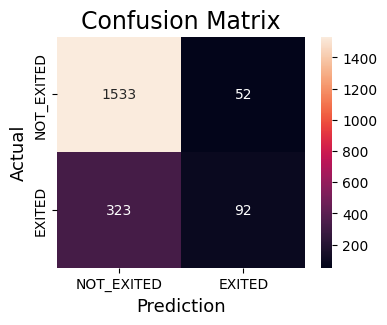

In [25]:
fig = plt.figure(figsize =(4, 3))
sb.heatmap(cp, 
            annot=True,
            fmt='g', 
            xticklabels=['NOT_EXITED','EXITED'],
            yticklabels=['NOT_EXITED','EXITED'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dclf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
y_train2= dclf.predict(X_train)
cm=confusion_matrix(y_train, y_train2)
print(f"Accuracy on Train Set is : {accuracy_score(y_train, y_train2)}")
print(f"F1-Score on Train Set is : {f1_score(y_train,y_train2, labels=None, pos_label=1, average='weighted')}")

Accuracy on Train Set is : 1.0
F1-Score on Train Set is : 1.0


In [28]:
y_pred2 = dclf.predict(X_test)
cp = confusion_matrix(y_test , y_pred2)
print(f"Accuracy on Test Set is : {accuracy_score(y_test, y_pred2)}")
print(f"F1-Score on Test Set is : {f1_score(y_test, y_pred2, labels=None, pos_label=1, average='weighted')}")
print(classification_report(y_test , y_pred2))

Accuracy on Test Set is : 0.792
F1-Score on Test Set is : 0.7923674048758467
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1585
           1       0.50      0.50      0.50       415

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.79      0.79      0.79      2000



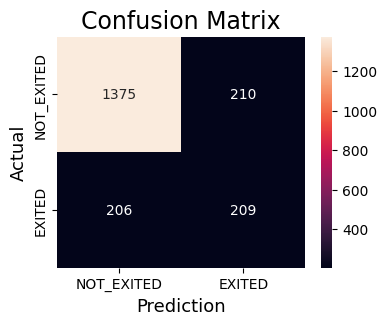

In [29]:
cp = confusion_matrix(y_test , y_pred2)
fig = plt.figure(figsize =(4, 3))
sb.heatmap(cp, 
            annot=True,
            fmt='g', 
            xticklabels=['NOT_EXITED','EXITED'],
            yticklabels=['NOT_EXITED','EXITED'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rclf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [31]:
y_train3= rclf.predict(X_train)
cm=confusion_matrix(y_train, y_train3)
print(f"Accuracy on Train Set is : {accuracy_score(y_train, y_train3)}")
print(f"F1-Score on Train Set is : {f1_score(y_train,y_train3, labels=None, pos_label=1, average='weighted')}")

Accuracy on Train Set is : 1.0
F1-Score on Train Set is : 1.0


In [32]:
y_pred3 = rclf.predict(X_test)
cp = confusion_matrix(y_test , y_pred3)
print(f"Accuracy on Test Set is : {accuracy_score(y_test, y_pred3)}")
print(f"F1-Score on Test Set is : {f1_score(y_test, y_pred3, labels=None, pos_label=1, average='weighted')}")
print(classification_report(y_test , y_pred3))

Accuracy on Test Set is : 0.863
F1-Score on Test Set is : 0.8479409555013158
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.80      0.46      0.58       415

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



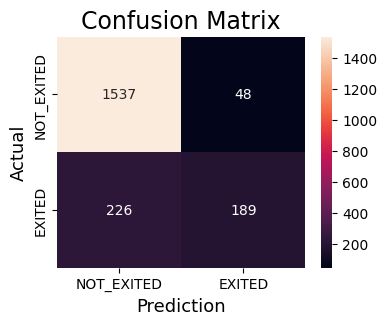

In [33]:
cp = confusion_matrix(y_test , y_pred3)
fig = plt.figure(figsize=(4,3))
sb.heatmap(cp, 
            annot=True,
            fmt='g', 
            xticklabels=['NOT_EXITED','EXITED'],
            yticklabels=['NOT_EXITED','EXITED'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## XGBoost Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
clfg = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,random_state=0
                                 ).fit(X_train, y_train)

In [35]:
y_train4= clfg.predict(X_train)
cm=confusion_matrix(y_train, y_train4)
print(f"Accuracy on Train Set is : {accuracy_score(y_train, y_train4)}")
print(f"F1-Score on Train Set is : {f1_score(y_train,y_train4, labels=None, pos_label=1, average='weighted')}")

Accuracy on Train Set is : 0.8745
F1-Score on Train Set is : 0.8618186953194527


In [36]:
y_pred4 = clfg.predict(X_test)
cp = confusion_matrix(y_test , y_pred4)
print(f"Accuracy on Test Set is : {accuracy_score(y_test, y_pred4)}")
print(f"F1-Score on Test Set is : {f1_score(y_test, y_pred4, labels=None, pos_label=1, average='weighted')}")
print(classification_report(y_test , y_pred4))

Accuracy on Test Set is : 0.86
F1-Score on Test Set is : 0.846427313440346
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1585
           1       0.77      0.47      0.58       415

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



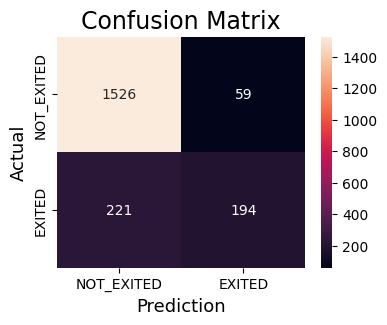

In [37]:
cp = confusion_matrix(y_test , y_pred4)
fig = plt.figure(figsize=(4,3))
sb.heatmap(cp, 
            annot=True,
            fmt='g', 
            xticklabels=['NOT_EXITED','EXITED'],
            yticklabels=['NOT_EXITED','EXITED'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Support Vector

In [38]:
from sklearn.svm import SVC
sclf = SVC(kernel = 'linear', random_state = 0)
sclf.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [39]:
y_train5= sclf.predict(X_train)
cm=confusion_matrix(y_train, y_train5)
print(f"Accuracy on Train Set is : {accuracy_score(y_train, y_train5)}")
print(f"F1-Score on Train Set is : {f1_score(y_train,y_train5, labels=None, pos_label=1, average='weighted')}")

Accuracy on Train Set is : 0.79725
F1-Score on Train Set is : 0.7073112393935179


In [40]:
y_pred5 = sclf.predict(X_test)
cp = confusion_matrix(y_test , y_pred5)
print(f"Accuracy on Test Set is : {accuracy_score(y_test, y_pred5)}")
print(f"F1-Score on Test Set is : {f1_score(y_test, y_pred5, labels=None, pos_label=1, average='weighted')}")
# print(classification_report(y_test , y_pred5))

Accuracy on Test Set is : 0.7925
F1-Score on Test Set is : 0.7007601115760111


## Naive Bayes Classifier

In [41]:
from sklearn.naive_bayes import GaussianNB
nclf = GaussianNB()
nclf.fit(X_train, y_train)

GaussianNB()

In [42]:
y_train6= nclf.predict(X_train)
cm=confusion_matrix(y_train, y_train6)
print(f"Accuracy on Train Set is : {accuracy_score(y_train, y_train6)}")
print(f"F1-Score on Train Set is : {f1_score(y_train,y_train6, labels=None, pos_label=1, average='weighted')}")

Accuracy on Train Set is : 0.817375
F1-Score on Train Set is : 0.8015011240152204


In [43]:
y_pred6 = nclf.predict(X_test)
cp = confusion_matrix(y_test , y_pred6)
print(f"Accuracy on Test Set is : {accuracy_score(y_test, y_pred6)}")
print(f"F1-Score on Test Set is : {f1_score(y_test, y_pred6, labels=None, pos_label=1, average='weighted')}")
print(classification_report(y_test , y_pred6))

Accuracy on Test Set is : 0.8205
F1-Score on Test Set is : 0.8026716078051199
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1585
           1       0.61      0.37      0.46       415

    accuracy                           0.82      2000
   macro avg       0.73      0.65      0.68      2000
weighted avg       0.80      0.82      0.80      2000

